In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [2]:
data = pd.read_excel("Dane.xlsx")
data.set_index("Województwo", inplace = True)
data

,Stopa bezrobocia (X1),Przeciętne miesięczne wydatki na osobę (X2)
Województwo,,
DOLNOŚLĄSKIE,9.708333,1120.834545
KUJAWSKO-POMORSKIE,13.916667,979.980000
LUBELSKIE,11.483333,938.316364
LUBUSKIE,11.666667,1039.879091
ŁÓDZKIE,10.258333,1111.880909
MAŁOPOLSKIE,8.308333,980.346364
MAZOWIECKIE,8.116667,1328.315455
OPOLSKIE,10.708333,1092.571818
PODKARPACKIE,13.166667,866.733636


In [3]:
data.rename(columns = {"Stopa bezrobocia (X1)" : "Y", "Przeciętne miesięczne wydatki na osobę (X2)" : "X"}, inplace = True)
data.head()

,Y,X
Województwo,,
DOLNOŚLĄSKIE,9.708333,1120.834545
KUJAWSKO-POMORSKIE,13.916667,979.980000
LUBELSKIE,11.483333,938.316364
LUBUSKIE,11.666667,1039.879091
ŁÓDZKIE,10.258333,1111.880909


In [4]:
y = data['Y'].values
x = data['X'].values.reshape(-1,1)

In [5]:
model = LinearRegression()

In [7]:
# Calculating the optimal values of the weights b0, b1
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model = LinearRegression().fit(x,y)

In [9]:
R2 = model.score(x,y)
print('Coefficient of determination: ', R2)

Coefficient of determination:  0.2682042740386431


In [10]:
# As we can see the coefficient of determination is pretty low (26,8%)
# it means that unemployment rate explains 26,8% of average mothly expenses variance
# So 73,2% is explained by the other attributes 
print('intercept: ', model.intercept_)
print('coefficients: ', model.coef_)

intercept:  23.053248729375852
coefficients:  [-0.01174113]


In [11]:
# The code above illustrates b0 and b1 parameters. 
# b0 = 23,05 and b1 = -0,011
y_pred = model.predict(x)
print('Predicted response: ', y_pred, sep = '\n')

Predicted response: 
[ 9.89338163 11.54717353 12.03635182 10.84389036  9.99850746 11.54287201
  7.45732075 10.22521806 12.87681411 12.02162203 10.32475084 10.06611504
 12.41737292 12.44987451 11.92803453 10.77070041]


<function matplotlib.pyplot.show(*args, **kw)>

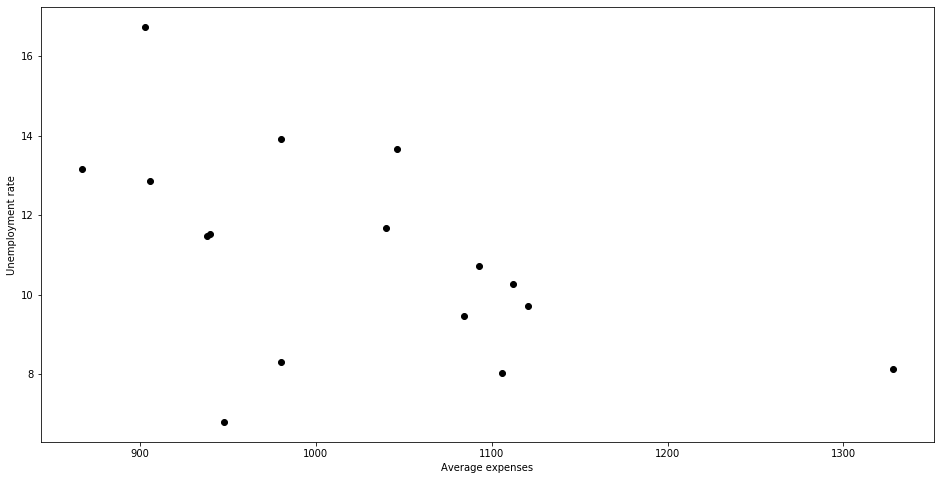

In [12]:
# What is the plot of our data:
plt.figure(figsize = (16,8))
plt.scatter(x, y, c = 'black')
plt.xlabel("Average expenses")
plt.ylabel("Unemployment rate")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

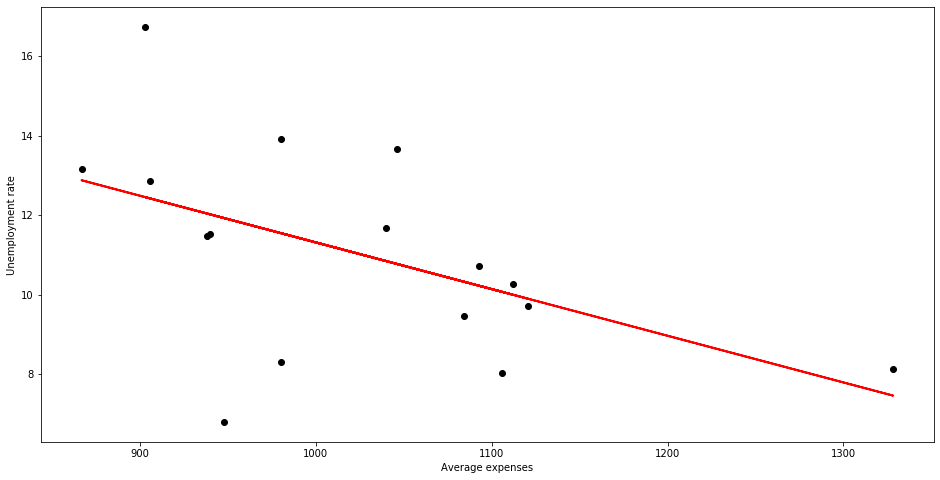

In [13]:
# And now lets try to fit it with our linear approximation 
plt.figure(figsize = (16,8))
plt.scatter(x, y, c = 'black')
plt.plot(x, y_pred, linewidth = 2, c = 'r')
plt.xlabel("Average expenses")
plt.ylabel("Unemployment rate")
plt.show

In [14]:
# Getting the whole summation
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     5.131
Date:                Thu, 21 May 2020   Prob (F-statistic):             0.0399
Time:                        12:39:42   Log-Likelihood:                -35.204
No. Observations:                  16   AIC:                             74.41
Df Residuals:                      14   BIC:                             75.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0532      5.342      4.315      0.0

C:\Users\Mateusz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


### To conclude we have our x1 parameter statisticaly significant at the 0,05 level